# Tarea 6
### En este notebook se realizarán las comprobaciones correspondientes a la tarea 6, todo el codigo y los resultados hayados servirá para la realización del informe. La interpretación de los resultados y las explicaciones de la implementación de las funciones estarán en el informe de prácticas.
### Autor: Victor Brown Sogorb

En la tarea 6 debemos utilizar el perceptrón multicapa (MLP) de sklearn y comparar las métricas halladas de entrenar este clasificador y hacer la predicción con los datos usados anteriormente en la práctica con aquellas métricas halladas de entrenar el MLP con *todos* los datos provenientes de Ximage e yimage y hacer el test con unos nuevos datos.

Cargamos los datos que usaremos en el primer análisis:

In [5]:
from Funciones.Funciones_prop import carga_data_MNIST  #Importamos dicha función
from Funciones.Tarea_1 import crea_diccionario 
from Funciones.Tarea_2 import getdataset
from sklearn.model_selection import train_test_split

#Cargamos los datos en las variables images y labels
input_path = 'Data'
file_images = 'emnist-balanced-images-idx3-ubyte.gz'
file_labels = 'emnist-balanced-labels-idx1-ubyte.gz'

[images, labels] = carga_data_MNIST(input_path, file_images, file_labels)


#Creamos el diccionario caracteres
archivo_claves = "Data\\claves_ASCII.txt"
caracteres = crea_diccionario(archivo_claves)

#Obtenemso Ximage e yimage
Ximage, yimage= getdataset(images,labels, caracteres, 16)

#Obtenemos el split de entrenamiento:
X_train, X_test, y_train, y_test = train_test_split(Ximage, yimage, stratify=yimage, train_size=0.7)

***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
112800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
112800
***********************************


#### Entrenamos el MLP

In [6]:
'''
Entrena un clasificador (Perceptrón multicapa) con el conjunto de entrenamiento
'''

# puede tardar unos segundos
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()

classifier.fit(X_train, y_train)

print("Numero de capas: " + str(classifier.n_layers_))
print("Numero de salidas: " + str(classifier.n_outputs_))
print("Función de activación: " + str(classifier.out_activation_))

Numero de capas: 3
Numero de salidas: 47
Función de activación: softmax


#### Predecimos:

In [7]:
y_pred = classifier.predict(X_test)

#### Mostramos la matriz de confusión y métricas:

0.758628841607565
[0.58450704 0.47535211 0.75300401 0.85543767 0.78441558 0.7860262
 0.79358438 0.92598187 0.71052632 0.62313433 0.7521059  0.82047478
 0.88217968 0.77749361 0.83772538 0.51360174 0.7676399  0.8902439
 0.70285714 0.77862595 0.84398217 0.45839874 0.85674548 0.80079681
 0.68849558 0.81167109 0.70660147 0.81604426 0.77278912 0.90043924
 0.7575     0.84100418 0.86141304 0.81746032 0.83537653 0.82436261
 0.8217636  0.82304527 0.90045942 0.81818182 0.58980583 0.49633968
 0.89393939 0.89909639 0.48259494 0.79534314 0.71779141]
[0.69166667 0.75       0.78333333 0.89583333 0.83888889 0.75
 0.79027778 0.85138889 0.7875     0.69583333 0.86805556 0.76805556
 0.83194444 0.84444444 0.83888889 0.65555556 0.87638889 0.81111111
 0.34166667 0.85       0.78888889 0.40555556 0.85555556 0.8375
 0.54027778 0.85       0.80277778 0.81944444 0.78888889 0.85416667
 0.84166667 0.8375     0.88055556 0.85833333 0.6625     0.80833333
 0.60833333 0.83333333 0.81666667 0.85       0.3375     0.47083333

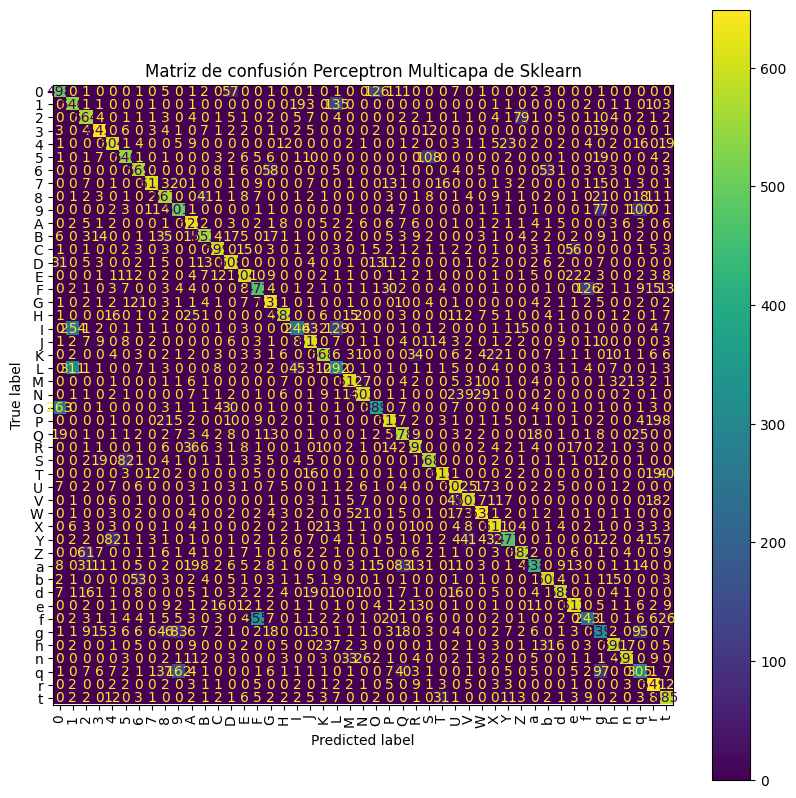

In [8]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred, average=None))
print(metrics.recall_score(y_test, y_pred, average=None))

labels=np.unique(y_test)
conf_mat = metrics.confusion_matrix(y_test, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron Multicapa de Sklearn")
plt.xticks(rotation='vertical')
plt.show()

### Ahora se realizarán los mismos pasos pero añadiendo nuevos datos

In [9]:
#Abrimos los datos nuevos
input_path='Data'
file_images= 'emnist-balanced-test-images-idx3-ubyte.gz'
file_labels = 'emnist-balanced-test-labels-idx1-ubyte.gz'

[images_test,labels_test]=carga_data_MNIST(input_path,file_images,file_labels)

X_test, y_test = getdataset(images_test,labels_test, caracteres, 16)

***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
18800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
18800
***********************************


#### Entrenamos el MLP con todos los datos antiguos

In [10]:
'''
Entrena un clasificador (Perceptrón multicapa) con el conjunto de entrenamiento
'''

# puede tardar unos segundos
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()

classifier.fit(Ximage, yimage) #Datos antiguos

print("Numero de capas: " + str(classifier.n_layers_))
print("Numero de salidas: " + str(classifier.n_outputs_))
print("Función de activación: " + str(classifier.out_activation_))

Numero de capas: 3
Numero de salidas: 47
Función de activación: softmax


#### Predecimos con los datos nuevos:

In [11]:
y_pred = classifier.predict(X_test)

#### Mostramos la matriz de confusión y métricas:

0.7602127659574468
[0.61622807 0.50949914 0.66285714 0.88549618 0.79       0.85321101
 0.79427083 0.93066667 0.71106095 0.56260434 0.80528846 0.84225352
 0.83614458 0.81538462 0.80182232 0.61344538 0.80150754 0.88858696
 0.66539924 0.8559322  0.82115869 0.46571429 0.85572139 0.80310881
 0.65079365 0.77589852 0.74831461 0.78622328 0.81767956 0.82608696
 0.85638298 0.86968085 0.825      0.84987277 0.75581395 0.8534202
 0.72405063 0.88695652 0.84813084 0.85158151 0.53228963 0.61748634
 0.84517766 0.75264271 0.42820513 0.81666667 0.83055556]
[0.7025 0.7375 0.87   0.87   0.79   0.6975 0.7625 0.8725 0.7875 0.8425
 0.8375 0.7475 0.8675 0.795  0.88   0.365  0.7975 0.8175 0.4375 0.7575
 0.815  0.4075 0.86   0.775  0.615  0.9175 0.8325 0.8275 0.74   0.9025
 0.805  0.8175 0.9075 0.835  0.8125 0.655  0.715  0.765  0.9075 0.875
 0.68   0.2825 0.8325 0.89   0.4175 0.8575 0.7475]


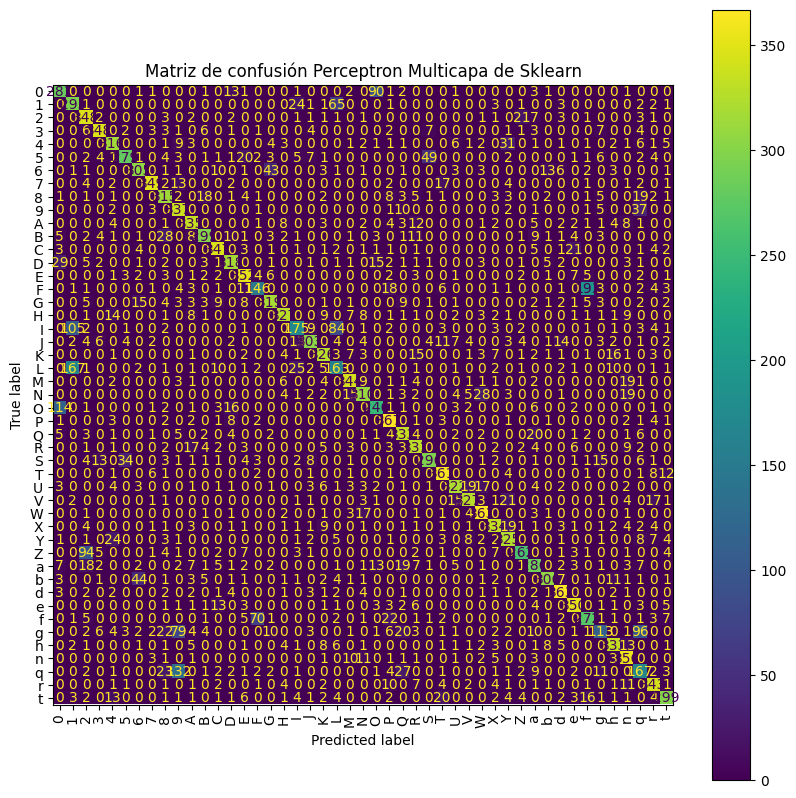

In [12]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred, average=None))
print(metrics.recall_score(y_test, y_pred, average=None))

labels=np.unique(y_test)

conf_mat = metrics.confusion_matrix(y_test, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron Multicapa de Sklearn")
plt.xticks(rotation='vertical')
plt.show()